In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

from PIL import Image

In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
torch.cuda.is_available()

True

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


#### Download data

In [5]:
train_dataset = torchvision.datasets.CIFAR10(root='D:/Data/Study/cifar10/',
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=True)

Files already downloaded and verified


In [6]:
image, label = train_dataset[0]
print(image.size())
print(label)

torch.Size([3, 32, 32])
6


In [7]:
img_pil = torchvision.transforms.functional.to_pil_image(image)

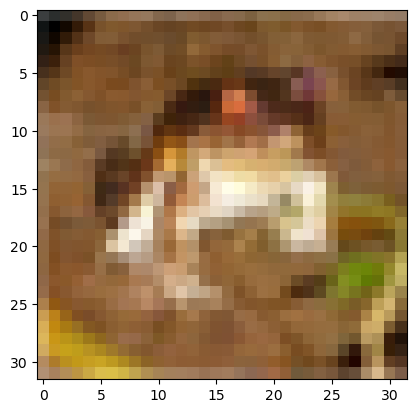

In [8]:
plt.imshow(img_pil)

In [9]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

In [10]:
test_dataset = torchvision.datasets.CIFAR10(root='D:/Data/Study/cifar10/', train=False,
                                       download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=8,
                                         shuffle=False)

Files already downloaded and verified


In [11]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')

In [12]:
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim=256, output_dim):
        super().__init__()

        self.fc1 = nn.Linear(input_dim, 256)
        self.fc2 = nn.Linear(256, 32)
        self.fc3 = nn.Linear(32, 256)
        self.fc4 = nn.Linear(256, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        return x
    
    def predict(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        x = F.softmax(x, 1)
        return x
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(3, 6, 5)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.conv2 = nn.Conv2d(6, 16, 5)
#         self.fc1 = nn.Linear(16 * 5 * 5, 256)
#         self.fc2 = nn.Linear(256, 64)
#         self.fc3 = nn.Linear(64, 10)

#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = x.view(-1, 16 * 5 * 5)
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x

In [14]:
net = Net(3072, 256, 10)
net.train()
#net.to(device)

Net(
  (fc1): Linear(in_features=3072, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=10, bias=True)
)

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

In [16]:
epochs = 10

for epoch in range(epochs):  
    running_loss = 0.0
    running_items = 0.0
    
    for i, data in enumerate(train_loader):
        inputs, labels = data[0], data[1]
       
        # обнуляем градиент
        optimizer.zero_grad()
        
        # make prediction
        outputs = net(inputs)
        
        # calculate loss-function
        loss = criterion(outputs, labels)
        
        # make loss backstep
        loss.backward()
        
        # make optimizer step 
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        running_items +=len(labels)
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print(f'Epoch [{epoch + 1}/{epochs}]. ' \
                  f'Step [{i + 1 } / {len(train_loader)}]. ' \
                  f'Loss: {running_loss / running_items:.3f}')
            running_loss, running_items = 0.0, 0.0

print('Training is finished!')

Epoch [1/10]. Step [1 / 782]. Loss: 0.036
Epoch [1/10]. Step [301 / 782]. Loss: 0.032
Epoch [1/10]. Step [601 / 782]. Loss: 0.029
Epoch [2/10]. Step [1 / 782]. Loss: 0.028
Epoch [2/10]. Step [301 / 782]. Loss: 0.027
Epoch [2/10]. Step [601 / 782]. Loss: 0.027
Epoch [3/10]. Step [1 / 782]. Loss: 0.028
Epoch [3/10]. Step [301 / 782]. Loss: 0.026
Epoch [3/10]. Step [601 / 782]. Loss: 0.025
Epoch [4/10]. Step [1 / 782]. Loss: 0.027
Epoch [4/10]. Step [301 / 782]. Loss: 0.025
Epoch [4/10]. Step [601 / 782]. Loss: 0.024
Epoch [5/10]. Step [1 / 782]. Loss: 0.024
Epoch [5/10]. Step [301 / 782]. Loss: 0.024
Epoch [5/10]. Step [601 / 782]. Loss: 0.024
Epoch [6/10]. Step [1 / 782]. Loss: 0.024
Epoch [6/10]. Step [301 / 782]. Loss: 0.023
Epoch [6/10]. Step [601 / 782]. Loss: 0.023
Epoch [7/10]. Step [1 / 782]. Loss: 0.024
Epoch [7/10]. Step [301 / 782]. Loss: 0.023
Epoch [7/10]. Step [601 / 782]. Loss: 0.023
Epoch [8/10]. Step [1 / 782]. Loss: 0.021
Epoch [8/10]. Step [301 / 782]. Loss: 0.022
Epoc

In [17]:
PATH_MODEL = 'D:/Data/Study/cifar10/cifar10_net_model.pth'

In [18]:
torch.save(net, PATH_MODEL)

In [19]:
net = torch.load(PATH_MODEL)
net

Net(
  (fc1): Linear(in_features=3072, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=10, bias=True)
)

In [20]:
data_iter = iter(test_loader)
images, labels = data_iter.next()

GroundTruth:  cat ship ship plane frog frog car frog


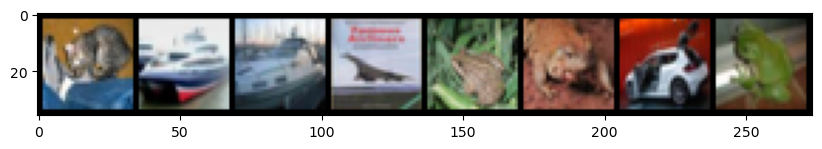

In [21]:
net.eval()
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.figure(figsize=(10,5))
plt.imshow(torchvision.transforms.functional.to_pil_image(imgs))
print('GroundTruth: ', ' '.join(classes[labels[j]] for j in range(len(labels))))

In [22]:
_, predicted = torch.max(outputs, 1)
predicted

tensor([3, 9, 8, 0, 4, 6, 3, 6])

In [23]:
print('Predicted:', ' '.join(classes[predicted[j]] for j in range(len(labels))))

Predicted: cat truck ship plane deer frog cat frog


In [24]:
gt = np.array([classes[labels[j]] for j in range(len(labels))])
pred =  np.array([classes[predicted[j]] for j in range(len(labels))])
print(gt)
print(pred)
print(f'Accuracy: {(gt == pred).sum()/len(gt)}')

['cat' 'ship' 'ship' 'plane' 'frog' 'frog' 'car' 'frog']
['cat' 'truck' 'ship' 'plane' 'deer' 'frog' 'cat' 'frog']
Accuracy: 0.625


## MNIST from Tensorflow to PyTorch

In [25]:
mnist_train_dataset = torchvision.datasets.MNIST(root='D:/Data/Study/MNIST/', train=True,
                                    download=True, transform=transforms.ToTensor())
mnist_train_loader = torch.utils.data.DataLoader(mnist_train_dataset, batch_size=64,
                                      shuffle=True)

C:\Users\xiaomi\AppData\Roaming\Python\Python39\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [26]:
image, label = mnist_train_dataset[0]
print(image.size())
print(label)

torch.Size([1, 28, 28])
5


In [27]:
img_pil = torchvision.transforms.functional.to_pil_image(image)

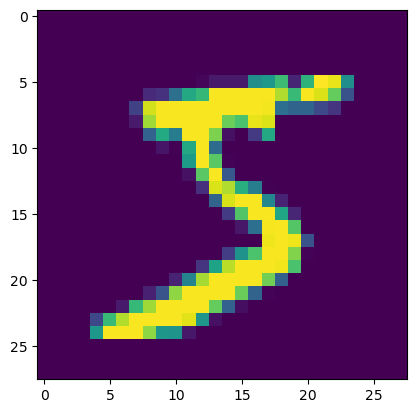

In [28]:
plt.imshow(img_pil)

In [29]:
classes = ('zero', 'one', 'two', 'three', 'four', 
           'five', 'six', 'seven', 'eight', 'nine')

In [30]:
mnist_test_dataset = torchvision.datasets.MNIST(root='D:/Data/Study/MNIST/', train=False,
                                       download=True, transform=transforms.ToTensor())
mnist_test_loader = torch.utils.data.DataLoader(mnist_test_dataset, batch_size=8,
                                         shuffle=False)

In [31]:
class Net_mnist(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Dropout2d()
        self.fc3 = nn.Linear(128, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = x.view(x.shape[0], -1)
        x = self.fc3(x)
        x = F.softmax(x)
        return x

In [32]:
net = Net_mnist(784, 128, 10)
net.train()

Net_mnist(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Dropout2d(p=0.5, inplace=False)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)

In [33]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

In [34]:
epochs = 2

for epoch in range(epochs):  
    running_loss = 0.0
    running_items = 0.0
    
    for i, data in enumerate(mnist_train_loader):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()
        
        # make prediction
        outputs = net(inputs)
        
        # calculate loss-function
        loss = criterion(outputs, labels)
        
        # make loss backstep
        loss.backward()
        
        # make optimizer step 
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        running_items +=len(labels)
        if i % 100 == 0:    # печатаем каждые 100 mini-batches
            print(f'Epoch [{epoch + 1}/{epochs}]. ' \
                  f'Step [{i + 1 } / {len(mnist_train_loader)}]. ' \
                  f'Loss: {running_loss / running_items:.3f}')
            running_loss, running_items = 0.0, 0.0

print('Training is finished!')

C:\Users\xiaomi\AppData\Local\Temp\ipykernel_13496\1526177789.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


Epoch [1/2]. Step [1 / 938]. Loss: 0.036
Epoch [1/2]. Step [101 / 938]. Loss: 0.031
Epoch [1/2]. Step [201 / 938]. Loss: 0.027
Epoch [1/2]. Step [301 / 938]. Loss: 0.026
Epoch [1/2]. Step [401 / 938]. Loss: 0.025
Epoch [1/2]. Step [501 / 938]. Loss: 0.025
Epoch [1/2]. Step [601 / 938]. Loss: 0.025
Epoch [1/2]. Step [701 / 938]. Loss: 0.025
Epoch [1/2]. Step [801 / 938]. Loss: 0.025
Epoch [1/2]. Step [901 / 938]. Loss: 0.025
Epoch [2/2]. Step [1 / 938]. Loss: 0.024
Epoch [2/2]. Step [101 / 938]. Loss: 0.024
Epoch [2/2]. Step [201 / 938]. Loss: 0.024
Epoch [2/2]. Step [301 / 938]. Loss: 0.024
Epoch [2/2]. Step [401 / 938]. Loss: 0.024
Epoch [2/2]. Step [501 / 938]. Loss: 0.024
Epoch [2/2]. Step [601 / 938]. Loss: 0.024
Epoch [2/2]. Step [701 / 938]. Loss: 0.024
Epoch [2/2]. Step [801 / 938]. Loss: 0.024
Epoch [2/2]. Step [901 / 938]. Loss: 0.024
Training is finished!


In [35]:
PATH_MODEL = 'D:/Data/Study/MNIST/mnist_net_model.pth'

In [36]:
torch.save(net, PATH_MODEL)

In [37]:
net = torch.load(PATH_MODEL)
net

Net_mnist(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Dropout2d(p=0.5, inplace=False)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)

In [38]:
data_iter = iter(mnist_test_loader)
images, labels = data_iter.next()

GroundTruth:  seven two one zero four one four nine


C:\Users\xiaomi\AppData\Local\Temp\ipykernel_13496\1526177789.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


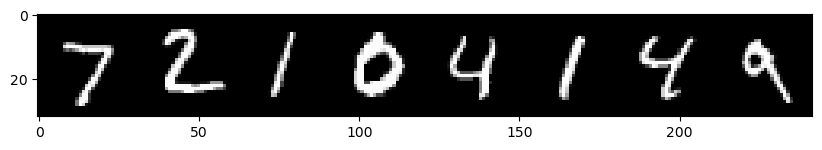

In [39]:
net.eval()
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.figure(figsize=(10,5))
plt.imshow(torchvision.transforms.functional.to_pil_image(imgs))
print('GroundTruth: ', ' '.join(classes[labels[j]] for j in range(len(labels))))

In [40]:
_, predicted = torch.max(outputs, 1)
predicted

tensor([7, 2, 1, 0, 4, 1, 4, 9])

In [41]:
gt = np.array([classes[labels[j]] for j in range(len(labels))])
pred =  np.array([classes[predicted[j]] for j in range(len(labels))])
print(gt)
print(pred)
print(f'Accuracy: {(gt == pred).sum()/len(gt)}')

['seven' 'two' 'one' 'zero' 'four' 'one' 'four' 'nine']
['seven' 'two' 'one' 'zero' 'four' 'one' 'four' 'nine']
Accuracy: 1.0
